# Neural network

Zalando is a multinational e-commerce platform selling fashion goods in many European countries. It released a [Fashion MNIST dataset](https://filesender.huji.ac.il/filesender/?s=download&token=d57c7cf8-2b40-4160-b3f4-583a65f051de) – a set of (60,000 train + 10,000 test, stored in fashion-mnist_train.zip and fashion-mnist_test.zip) images of 10 types of clothes. 
 
![title](Data/image.png)

a. Train fully connected neural network with few hidden layers to classify images in Fashion MNIST dataset. 



In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from sklearn.model_selection import train_test_split

In [3]:
# read data
train=pd.read_csv('Data/fashion-mnist_train.csv')
test=pd.read_csv('Data/fashion-mnist_test.csv')
print('Train data:',train.shape,'Test data:',test.shape)

Train data: (60000, 785) Test data: (10000, 785)


In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
# define labels and features
labels=train['label'].values
features=train.drop(['label'], axis=1).values
# split into train and test data
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
# reshape train & test data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# x_train = x_train/255.
# x_test = x_test/255


In [102]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
num_classes = len(class_names)
num_classes

10

In [103]:
# define model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dropout, MaxPooling2D, Dense

model = Sequential()
# layer 1
model.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.5))
# layer 2
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.5))
model.add(Flatten())
# fixed layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
# Output layer
model.add(Dense(num_classes, activation='softmax'))

In [84]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 7, 7, 32)         

In [104]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [105]:
model_history=model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=5)
model_history

Epoch 1/5
750/750 [==============================] - 53s 65ms/step - loss: 2.2699 - accuracy: 0.3299 - val_loss: 0.7854 - val_accuracy: 0.6981
Epoch 2/5
750/750 [==============================] - 54s 71ms/step - loss: 1.0465 - accuracy: 0.6123 - val_loss: 0.5929 - val_accuracy: 0.7616
Epoch 3/5
750/750 [==============================] - 58s 77ms/step - loss: 0.8384 - accuracy: 0.6798 - val_loss: 0.5500 - val_accuracy: 0.7969
Epoch 4/5
750/750 [==============================] - 55s 74ms/step - loss: 0.7323 - accuracy: 0.7220 - val_loss: 0.4754 - val_accuracy: 0.8156
Epoch 5/5
750/750 [==============================] - 51s 68ms/step - loss: 0.6638 - accuracy: 0.7458 - val_loss: 0.4473 - val_accuracy: 0.8222


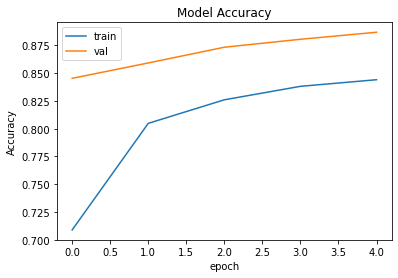

In [11]:
# Accuracy vs Epoch plot
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

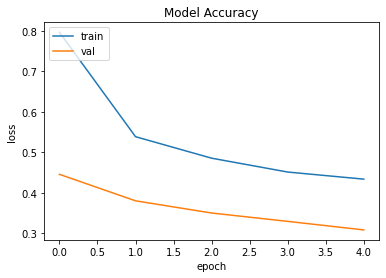

In [12]:
# Loss vs Epoch plot
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

b. “Play” with the number of the hidden layers and size of each layer. For each case, measure:

- i. The total number of network parameters.;
- ii. The network accuracy on the training and validation set (for each batch). 
- iii. Training and inference times. 

What can you learn from these experiments? Can they help you choose the best model? 
Use the data you have collected to support your answers. You are encouraged to use 
plots to make your arguments easier to convey. 


In [13]:
model1 = Sequential()
# layer 1
model1.add(Conv2D(128, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model1.add(MaxPooling2D((2,2), padding='same'))
model1.add(Dropout(0.5))
# layer 2
model1.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model1.add(MaxPooling2D((2,2), padding='same'))
model1.add(Dropout(0.5))
model1.add(Flatten())
# fixed layer
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
# Output layer
model1.add(Dense(num_classes, activation='softmax'))
model1.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model1_history=model1.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=5)
model1_history


Epoch 1/5
750/750 [==============================] - 108s 141ms/step - loss: 0.7284 - accuracy: 0.7370 - val_loss: 0.4067 - val_accuracy: 0.8489
Epoch 2/5
750/750 [==============================] - 105s 139ms/step - loss: 0.5017 - accuracy: 0.8201 - val_loss: 0.3504 - val_accuracy: 0.8707
Epoch 3/5
750/750 [==============================] - 103s 137ms/step - loss: 0.4463 - accuracy: 0.8381 - val_loss: 0.3300 - val_accuracy: 0.8821
Epoch 4/5
750/750 [==============================] - 121s 161ms/step - loss: 0.4150 - accuracy: 0.8502 - val_loss: 0.2925 - val_accuracy: 0.8945
Epoch 5/5
750/750 [==============================] - 150s 200ms/step - loss: 0.3891 - accuracy: 0.8591 - val_loss: 0.2862 - val_accuracy: 0.8939


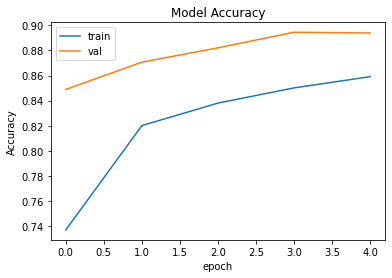

In [14]:
# Accuracy vs Epoch plot
plt.plot(model1_history.history['accuracy'])
plt.plot(model1_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

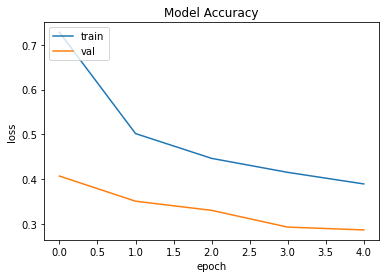

In [15]:
# Loss vs Epoch plot
plt.plot(model1_history.history['loss'])
plt.plot(model1_history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
model2 = Sequential()
# layer 1
model2.add(Conv2D(128, (5,5), padding='same', activation='relu', input_shape=(28,28,1)))
model2.add(MaxPooling2D((2,2), padding='same'))
model2.add(Dropout(0.5))
# layer 2
model2.add(Conv2D(64, (5,5), padding='same', activation='relu', input_shape=(28,28,1)))
model2.add(MaxPooling2D((2,2), padding='same'))
model2.add(Dropout(0.5))
model2.add(Flatten())
# fixed layer
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
# Output layer
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model2_history=model2.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=5)
model2_history


Epoch 1/5
750/750 [==============================] - 226s 297ms/step - loss: 0.5665 - accuracy: 0.7917 - val_loss: 0.3436 - val_accuracy: 0.8714
Epoch 2/5
750/750 [==============================] - 194s 259ms/step - loss: 0.3814 - accuracy: 0.8606 - val_loss: 0.2956 - val_accuracy: 0.8938
Epoch 3/5
750/750 [==============================] - 186s 248ms/step - loss: 0.3388 - accuracy: 0.8767 - val_loss: 0.2782 - val_accuracy: 0.8982
Epoch 4/5
750/750 [==============================] - 192s 256ms/step - loss: 0.3169 - accuracy: 0.8834 - val_loss: 0.2591 - val_accuracy: 0.9022
Epoch 5/5
750/750 [==============================] - 197s 263ms/step - loss: 0.3000 - accuracy: 0.8888 - val_loss: 0.2518 - val_accuracy: 0.9057


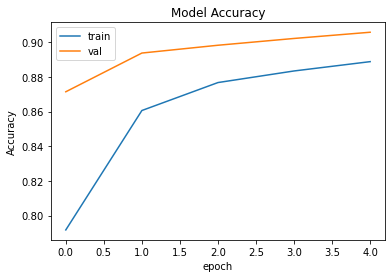

In [17]:
# Accuracy vs Epoch plot
plt.plot(model2_history.history['accuracy'])
plt.plot(model2_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

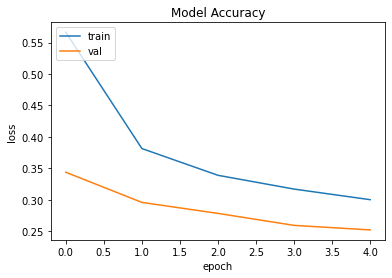

In [18]:
# Loss vs Epoch plot
plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Exlanation**:
> Applying different model variations parameters depecits how a model training behaves and on how the model can be be improved. This helps to easily choose the the best model  and the best parameters to use on prediction. The above plots cleary shows the models training path considering 'accuracy versus epoch'- as the epoch increases the accuracy of the model improves and 'loss versus epoch'. 

c. Test performance of the model of your choice using the test set. Compute confusion matrix

In [135]:
# we will use model2 to predict the test data
test_data = test.drop(['label'], axis=1).values
test_data= test_data.reshape(test_data.shape[0], 28, 28, 1)
actual=test['label'].values
predictions=model2.predict(test_data)
prediction=[]
for i in range(10000):
    pred = np.argmax(predictions[i]).tolist()
    prediction.append(pred)

313/313 [==============================] - 13s 43ms/step


Label: T-shirt/top
Prediction: T-shirt/top


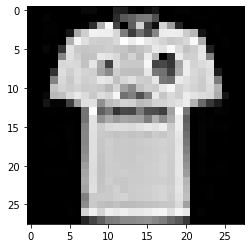

Label: Trouser
Prediction: Trouser


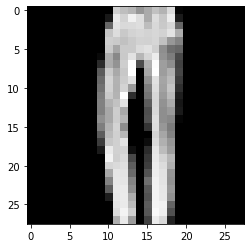

Label: Pullover
Prediction: Pullover


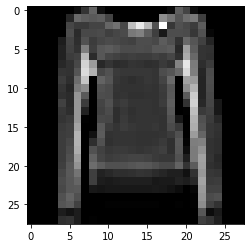

Label: Pullover
Prediction: Pullover


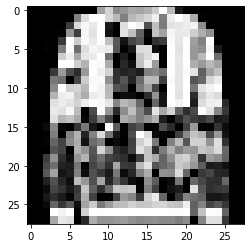

Label: Dress
Prediction: Coat


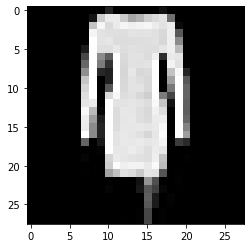

In [138]:
# display out some predicted samples
def show_example(index, preds, dsx, dsy):
    current_img = dsx[index][:, :, 0] * 255
    prediction = np.argmax(preds[index])
    labelP = class_names[prediction]
    if(len(dsy) > 0 or dsy != None) :
        label = class_names[dsy[index]]
        print("Label:", label)
    print("Prediction:", labelP)
    
    
    plt.imshow(current_img, interpolation='nearest', cmap='gray')
    plt.show()
for i in range(5):
    show_example(i, predictions, test_data, actual)

In [137]:
#display the confusion matrix
tf.math.confusion_matrix(actual,prediction)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[867,   2,  11,  12,  10,   3,  88,   0,   7,   0],
       [  0, 994,   0,   4,   2,   0,   0,   0,   0,   0],
       [ 15,   1, 723,   4, 224,   0,  33,   0,   0,   0],
       [ 18,   7,   4, 873,  79,   1,  15,   0,   2,   1],
       [  0,   0,  25,   4, 964,   1,   5,   0,   1,   0],
       [  0,   0,   0,   0,   1, 985,   0,   9,   2,   3],
       [164,   2,  61,  24, 273,   0, 470,   0,   6,   0],
       [  0,   0,   0,   0,   0,  30,   0, 917,   2,  51],
       [  1,   1,   2,   0,   5,   1,   0,   1, 988,   1],
       [  0,   0,   0,   0,   0,  20,   0,  15,   6, 959]])>

# Sentiment analysis

Your task is to train a sentiment analysis model that would be able to infer sentiment of a 
tweet. The file [‘tweet_sentiment.csv’](https://filesender.huji.ac.il/filesender/?s=download&token=cb00e2db-1ad2-445d-9992-9be4c88ae524) contains 1.4M tweets classified into positive (1) and negative (-1) sentiment (polarity). The file ‘tweet_sentiment_test.csv’ contains a sample of 320K tweets without 
sentiment (polarity=0). You are asked to train and test your model using ‘tweet_sentiment.csv’ data only. Once you feel 
confident, compute polarity for the tweets in ‘tweet_sentiment_test.csv’. 

Deliverables:

1. Your predictions for the tweets in the ‘tweet_sentiment_test.csv’ file. The file you submit should 
be named ‘sentiment_{id}.csv’ where id stands for your teudat zehut number. It should contain 
a header and two columns: ‘tweet_id’ and ‘polarity’, with polarity values being either 1 or -1. 
2. Report the accuracy you’d expect from your model. 
3. Also submit your Jupiter notebook.

In [2]:
# import libraries
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [3]:
# read data
tweets=pd.read_csv('Data/tweet_sentiment.csv')
tweets_test=pd.read_csv('Data/tweet_sentiment_test.csv')
tweets.head()

,polarity,tweet_id,tweet
0,1,2049966842,@_CrC_ WOOT! i'm great. thanks. we are the kin...
1,1,2062338304,@toytoyy ayeeee girl
2,-1,2032451037,had lovely dinner up in the drummonds. wreaked...
3,1,1993541290,Going to the USS intreped just saw ground zer...
4,-1,2204381262,Busted my ass infront of tin room tonight. Mis...


In [5]:
# define modeling data
dataset=tweets[['polarity','tweet']]
dataset.head()

,polarity,tweet
0,1,@_CrC_ WOOT! i'm great. thanks. we are the kin...
1,1,@toytoyy ayeeee girl
2,-1,had lovely dinner up in the drummonds. wreaked...
3,1,Going to the USS intreped just saw ground zer...
4,-1,Busted my ass infront of tin room tonight. Mis...


## Data Preprocesing and Cleaning

In [6]:
# create a new column 'text' and convert all text to lower case
dataset['text']=dataset['tweet'].str.lower()
dataset['text'].tail()

1399995                   @tracylatz ha! too true! thank u. 
1399996                                        i don't know 
1399997    havn't updated twitter in foreeeeeever. hannah...
1399998    way too full, a chinese restaurant has screwed...
1399999    my laptop is dead, cos apparently my life didn...
Name: text, dtype: object

In [7]:
# remove stopwords
stopwords= set(stopwords.words("english"))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()


0    @_crc_ woot! i'm great. thanks. kind eyes sist...
1                                 @toytoyy ayeeee girl
2    lovely dinner drummonds. wreaked, wanna go bed...
3              going uss intreped saw ground zero :..(
4    busted ass infront tin room tonight. miss baby...
Name: text, dtype: object

In [8]:
# remove all the special characters e.g '@', '!'
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

1399995                            tracylatz ha true thank u
1399996                                                 know
1399997    havnt updated twitter foreeeeeever hannah mont...
1399998                  way full chinese restaurant screwed
1399999    laptop dead cos apparently life suck enough al...
Name: text, dtype: object

In [9]:
# remove reapeating characters
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

1399995                            tracylatz ha true thank u
1399996                                                 know
1399997    havnt updated twitter foreeeeeever hannah mont...
1399998                  way full chinese restaurant screwed
1399999    laptop dead cos apparently life suck enough al...
Name: text, dtype: object

In [10]:
# remove urls
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

1399995                            tracylatz ha true thank u
1399996                                                 know
1399997    havnt updated twitter foreeeeeever hannah mont...
1399998                  way full chinese restaurant screwed
1399999    laptop dead cos apparently life suck enough al...
Name: text, dtype: object

In [11]:
# remove numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

1399995                            tracylatz ha true thank u
1399996                                                 know
1399997    havnt updated twitter foreeeeeever hannah mont...
1399998                  way full chinese restaurant screwed
1399999    laptop dead cos apparently life suck enough al...
Name: text, dtype: object

## Modeling

### Traing and test data | Vectorizer

In [12]:
# define label and features
X=dataset.text
y=dataset.polarity
# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state =26105111)

In [13]:
# encode the data using a vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectorizer.fit(X_train)
print('No. of feature_words: ', len(vectorizer.get_feature_names_out ()))

No. of feature_words:  4430031


In [14]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

### Training model - Logistic regression

In [19]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
predictions = LRmodel.predict(X_test)

### Report on Model evaluation 

              precision    recall  f1-score   support

          -1       0.80      0.80      0.80    140163
           1       0.80      0.80      0.80    139837

    accuracy                           0.80    280000
   macro avg       0.80      0.80      0.80    280000
weighted avg       0.80      0.80      0.80    280000



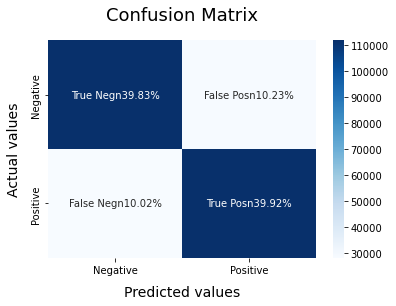

In [20]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
model_Evaluate(LRmodel)

## Predict the test data

In [42]:
#define test data
test_data  = vectorizer.transform(tweets_test['tweet'])
# predict
predictions = LRmodel.predict(test)
predictions

array([ 1,  1,  1, ..., -1,  1,  1], dtype=int64)

In [43]:
# create a dataframe of predictions and tweetid 
predictions=predictions.tolist()
tweetid=tweets_test['tweet_id'].to_list()
predicted_df=pd.DataFrame({'tweet_id':tweetid,'polarity':predictions})
predicted_df.head()

,tweet_id,polarity
0,1557375693,1
1,2193820060,1
2,2176629873,1
3,1963869593,1
4,1469943723,1


In [44]:
# save to a csv  file
predicted_df.to_csv('sentiment_{id}.csv')